In [3]:
import pandas as pd, numpy as np, babel as bl, scipy as sp, seaborn as sns, matplotlib.pyplot as plt, math as m, os
from babel import numbers
from scipy import stats

In [4]:
# Get the sales per month

In [ ]:
base_dir = '/Documents/Python_Data_Projects/15_Sales_Data'
file_names = [
    'Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv',
    'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv',
    'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv',
    'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']
for file_name in file_names:
    month = file_name.split('_')[1].lower()
    df = pd.read_csv(os.path.join(base_dir, file_name))
    globals()[f'df_{month[:3]}'] = df

In [6]:
frames = [df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_nov,df_dec,df_oct,df_sep]
full_df = pd.concat(frames)
full_df_c = full_df.dropna()

In [7]:
full_df_c = full_df_c[full_df_c['Order Date'].str.contains('Order Date')==False]

In [8]:
full_df_c['Month'] = full_df_c['Order Date'].str.split('/').str.get(0).astype(int)

In [9]:
full_df_c['Quantity Ordered'] = full_df_c['Quantity Ordered'].astype(int)
full_df_c['Price Each'] = full_df_c['Price Each'].astype(float)

In [10]:
full_df_c['Sales'] = full_df_c['Price Each'] * full_df_c['Quantity Ordered']

In [11]:
results = full_df_c.groupby('Month').sum()

Text(0, 0.5, 'Sales in USD ($)')

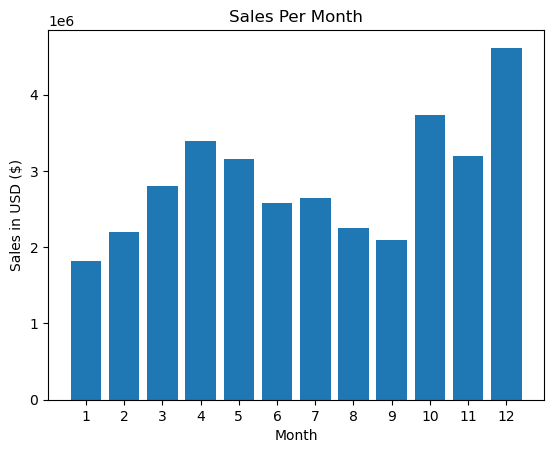

In [12]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.title('Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')

In [35]:
# What city had the highest number of sales?
full_df_c['City_&_State'] = full_df_c['Purchase Address'].str.split(',').str.get(1) + '(' + full_df_c['Purchase Address'].str.split(',').str.get(2).map(lambda x: x.strip('1234567890 ') + ')')

In [12]:
full_df_c['City_&_State'].unique()

array([' Dallas(TX)', ' Boston(MA)', ' Los Angeles(CA)',
       ' San Francisco(CA)', ' Seattle(WA)', ' Atlanta(GA)',
       ' New York City(NY)', ' Portland(OR)', ' Austin(TX)',
       ' Portland(ME)'], dtype=object)

In [36]:
results = full_df_c.groupby('City_&_State').sum()['Sales'].sort_values(ascending = False)
results.keys()

Index([' San Francisco(CA)', ' Los Angeles(CA)', ' New York City(NY)',
       ' Boston(MA)', ' Atlanta(GA)', ' Seattle(WA)', ' Dallas(TX)',
       ' Portland(OR)', ' Austin(TX)', ' Portland(ME)'],
      dtype='object', name='City_&_State')

In [37]:
results

City_&_State
San Francisco(CA)    8646175.23
Los Angeles(CA)      5716356.01
New York City(NY)    4851654.54
Boston(MA)           3815745.62
Atlanta(GA)          2930790.12
Seattle(WA)          2883223.66
Dallas(TX)           2877350.37
Portland(OR)         1977200.19
Austin(TX)           1904678.26
Portland(ME)          469585.96
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in USD ($)')

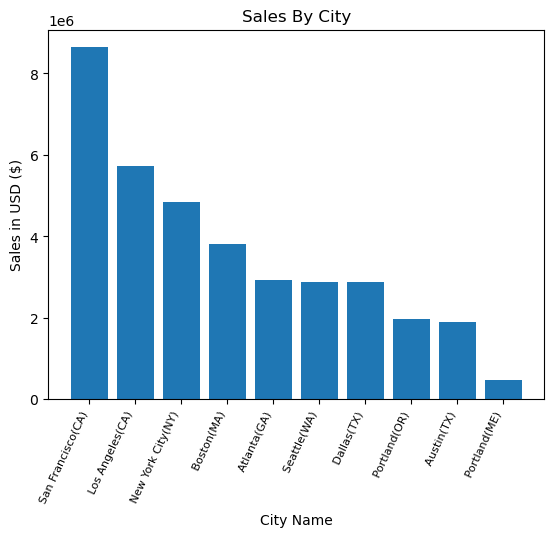

In [38]:
cities = results.keys()
plt.bar(cities, results)
plt.xticks(cities, rotation = 65, size=8, ha='right')
plt.title('Sales By City')
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')

In [16]:
#3: What time should we display advertisements to maximize the likeihood of customers buying products?

In [39]:
full_df_c['Order Date'] = pd.to_datetime(full_df_c['Order Date'])

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_56873/850741452.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_df_c['Order Date'] = pd.to_datetime(full_df_c['Order Date'])


In [40]:
full_df_c['Hour'] = full_df_c['Order Date'].dt.hour
full_df_c['Minute'] = full_df_c['Order Date'].dt.minute

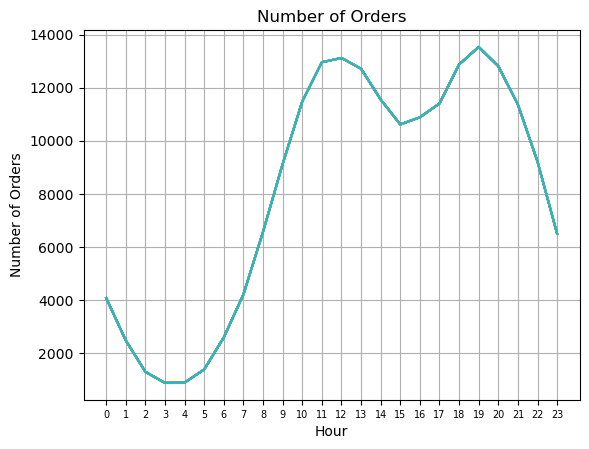

In [19]:
hours = [hour for hour, df in full_df_c.groupby('Hour')]
plt.plot(hours, full_df_c.groupby('Hour').count())
plt.xticks(hours, size=7)
plt.grid()
plt.title('Number of Orders')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()


In [20]:
# What products are most often sold together?

In [21]:
full_df_c = full_df_c[full_df_c['Order ID'].duplicated(keep=False)].sort_values('Order ID')
full_df_c['Grouped'] = full_df_c.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
full_df_c = full_df_c[['Order ID', 'Grouped']].drop_duplicates()

In [22]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in full_df_c['Grouped']:
    row_list = sorted(row.split(','))
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(20):
    print(key, value)

('Lightning Charging Cable', 'Lightning Charging Cable') 2271
('USB-C Charging Cable', 'USB-C Charging Cable') 2136
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 2106
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 2049
('Wired Headphones', 'Wired Headphones') 1926
('Apple Airpods Headphones', 'Apple Airpods Headphones') 1544
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1313
('Lightning Charging Cable', 'iPhone') 1273
('Google Phone', 'USB-C Charging Cable') 1254
('27in FHD Monitor', '27in FHD Monitor') 743
('iPhone', 'iPhone') 695
('34in Ultrawide Monitor', '34in Ultrawide Monitor') 660
('Google Phone', 'Google Phone') 583
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 568
('Wired Headphones', 'iPhone') 562
('Google Phone', 'Wired Headphones') 518
('Flatscreen TV', 'Flatscreen TV') 467
('Apple Airpods Headphones', 'iPhone') 465
('USB-C Charging Cable', 'Vareebadd Phone') 461
('Macbook Pro Laptop', 'Macbook Pro Laptop') 456


In [ ]:
# Get the quantity sold by product
mean_list = list(full_df_c[['Quantity Ordered','Product','Price Each']].groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values('Quantity Ordered', ascending=False)['Price Each'])

In [62]:
mean_list = [round(x) for x in mean_list]
mean_list = [bl.numbers.format_number(x, locale='en_US') for x in mean_list]

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_56873/1341719263.py:2: DeprecationWarning: Use babel.numbers.format_decimal() instead.
  mean_list = [bl.numbers.format_number(x, locale='en_US') for x in mean_list]


In [63]:
mean_list

['3',
 '4',
 '12',
 '15',
 '12',
 '150',
 '100',
 '150',
 '700',
 '380',
 '390',
 '600',
 '300',
 '1,700',
 '110',
 '1,000',
 '400',
 '600',
 '600']

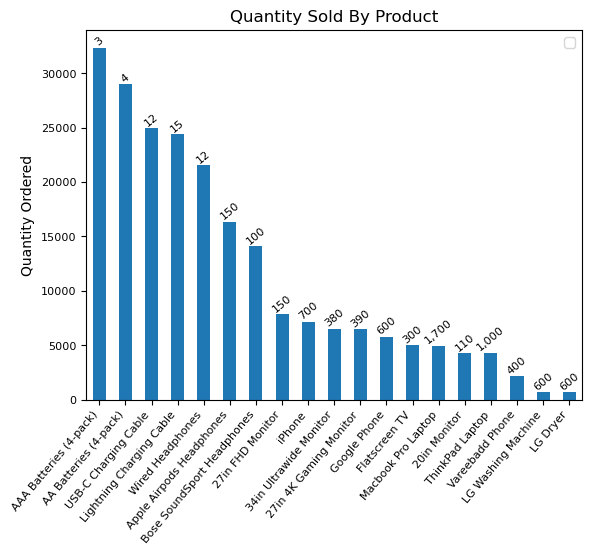

In [ ]:
quantity_ordered = full_df_c[['Quantity Ordered', 'Product', 'Price Each']].groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).sort_values('Quantity Ordered', ascending=False)['Quantity Ordered']

# Plot the bar chart
ax = quantity_ordered.plot.bar()
plt.title('Quantity Sold By Product')
plt.xticks(rotation=50, ha='right', size=8)
plt.xlabel('')
plt.ylabel('Quantity Ordered')
plt.yticks(size=8)
plt.legend('')

# Add bar labels
for i, value in enumerate(mean_list):
    ax.text(i, quantity_ordered.iloc[i], value, ha='center', va='bottom', size=8, rotation=40)
plt.show()
